In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import load_data

In [4]:
data = pd.read_csv("/Users/burhananis/Downloads/reference.csv", header=None)


In [5]:
data.head()


,0,1,2,3
0,test_001,Tumor,IDC,Macro
1,test_002,Tumor,ILC,Macro
2,test_003,Normal,DCIS,NaN
3,test_004,Tumor,IDC,Micro
4,test_005,Normal,DCIS,NaN


In [6]:
preds = load_data('/Users/burhananis/camelyon16-fully-supervised/evaluation/10k/slide_predictions.pkl')

In [7]:
ground_truth = data[1].map({'Tumor': 1, 'Normal': 0})

In [8]:
preds_binary = []
for value in preds.values():
    if value > 0.5:
        preds_binary.append(1)
    else:
        preds_binary.append(0)


In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

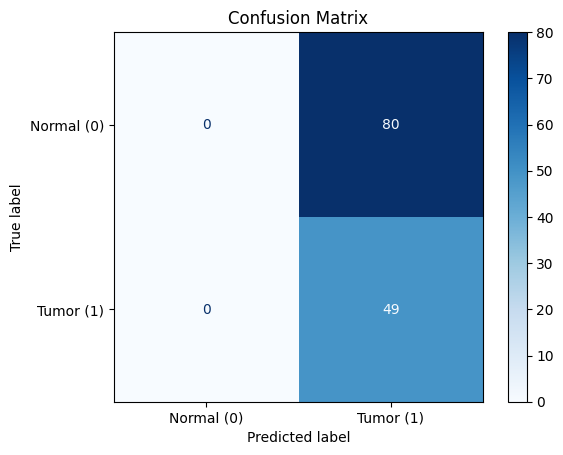

Accuracy: 0.3798
Precision: 0.3798
Recall: 1.0000
F1 Score: 0.5506


In [10]:
cm = confusion_matrix(ground_truth, preds_binary)

# Display the confusion matrix
labels = ['Normal (0)', 'Tumor (1)']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Print classification metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: {accuracy_score(ground_truth, preds_binary):.4f}")
print(f"Precision: {precision_score(ground_truth, preds_binary):.4f}")
print(f"Recall: {recall_score(ground_truth, preds_binary):.4f}")
print(f"F1 Score: {f1_score(ground_truth, preds_binary):.4f}")